In [31]:
import numpy as np
import pandas as pd
import time
import cv2 as cv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_csv("../data/processed/picture_data.csv")


### Parse to string

In [34]:
df = df.astype('string')

### Standaring Columns

In [19]:
#new_columns =list(map(lambda col:col.lower().replace(' ','_'),df.columns.to_list()))
#df.columns = new_columns


### Inspecting data

In [35]:
df.head()

,url,category,index,filename,Title,Creator,Date Created,External Link,Medium,Object Credit,...,Additional Artist Death Date,Additional Artist Birth Date,Alternate Titles,Scientist,Catalogue Reference,Additional Artist Details,"Painter, printmaker",Artist Death Place,Maker,Frame
0,https://lh3.googleusercontent.com/ci/AC_FhM_oa...,WHITE,0,0.jpg,"Symphony in White, No. 1 The White Girl",James McNeill Whistler,1862,For more information about this and thousand...,oil on canvas,Harris Whittemore Collection,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,https://lh3.googleusercontent.com/ci/AC_FhM9f2...,WHITE,1,1.jpg,The Cradle,<NA>,1872,http//www.musee-orsay.fr/en/collections/work...,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,https://lh3.googleusercontent.com/ci/AC_FhM8sQ...,WHITE,2,2.jpg,The Magpie,<NA>,1868 - 1869,http//www.musee-orsay.fr/en/collections/work...,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,https://lh3.googleusercontent.com/ci/AC_FhM9aa...,WHITE,3,3.jpg,Summer evening on Skagen Sønderstrand,Peder Severin Krøyer,1893,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,https://lh3.googleusercontent.com/ci/AC_FhM-xJ...,WHITE,4,4.jpg,"Composition with red, yellow and blue",Piet Mondriaan,1927,Collection searcher,Oil on canvas,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


# Describe Data

In [36]:
print('There are exist:',len(df.columns.to_list()), 'columns')

There are exist: 501 columns


**url:** the url of image source

**index:** identifier of image

**filename:** painting filename

**title:** painting title

**date created:** date the painting was created

**external link:** external link

**medium:** artistic technique

, 'category', 'index', 'filename', 'Title', 'Creator', 'Date Created', 'External Link', 'Medium', 'Object Credit', 'Dimensions', 'Classification', 'Artist School', 'Artist Nationality', 'Artist Details', 'Provenance', 'Physical Dimensions', 'Painter', 'Original Title', 'Credit Line', 'Type', 'Rights']

# Data exploration

In [37]:
df_nulls = df.isnull().sum().to_frame()
df_nulls.columns = ['acc_null']
df_nulls = df_nulls.sort_values('acc_null')
df_nulls['column'] = df_nulls.index

<AxesSubplot:ylabel='column'>

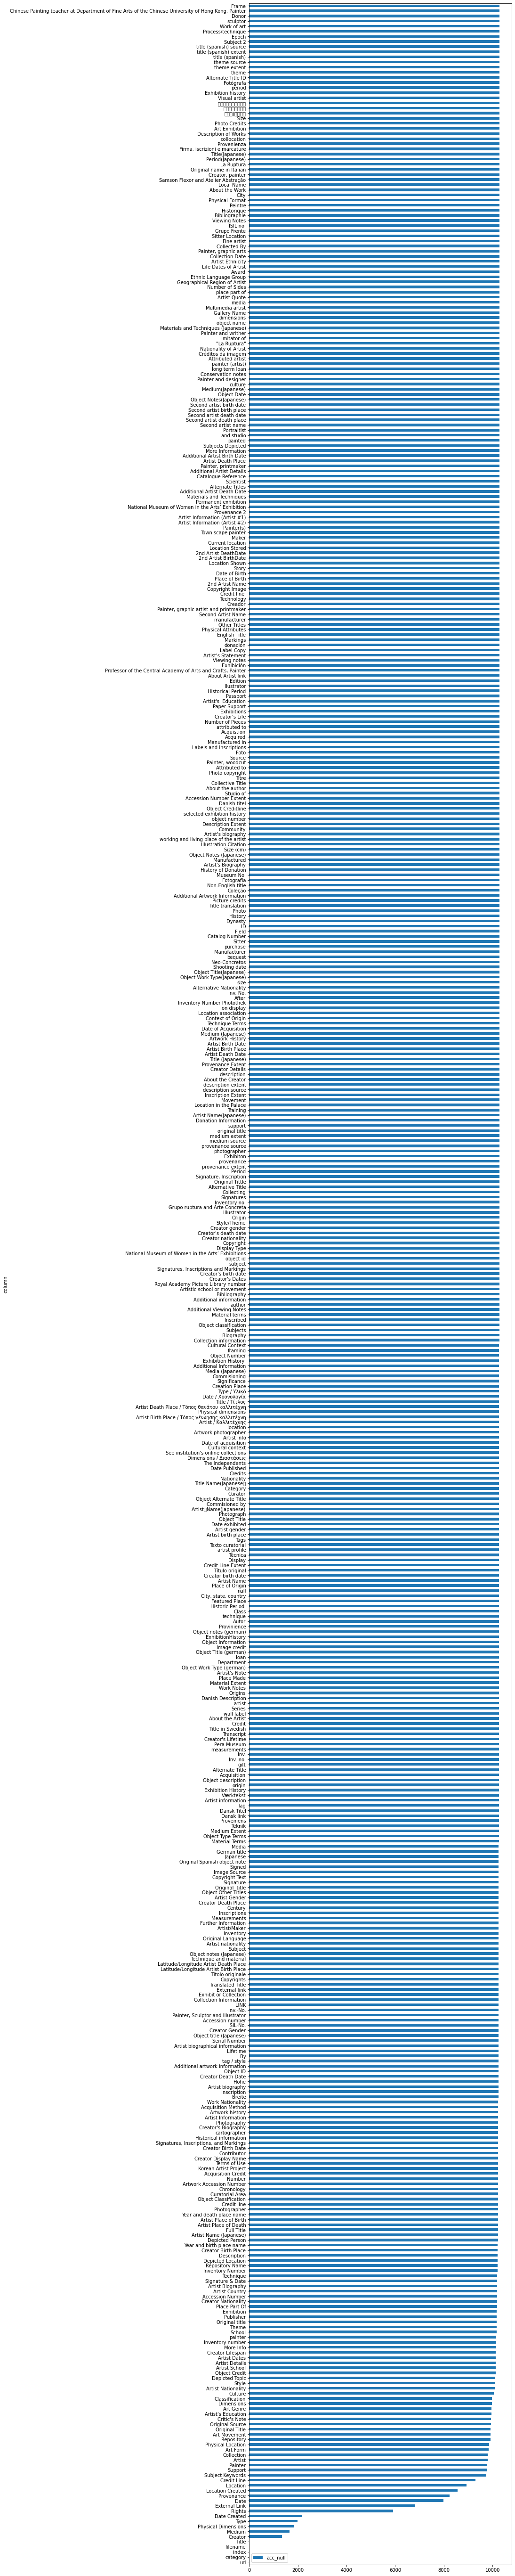

In [38]:
df_nulls.plot.barh(x='column',y='acc_null', figsize=[10,100])

Many columns contain majority **null values**, so...

only columns with less than 10000 null data will be kept

In [87]:
junk_columns =df_nulls[df_nulls['acc_null']>10000]['column'].values.tolist()

In [88]:
clean_df =df.drop(junk_columns,axis=1)

In [89]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10287 entries, 0 to 10286
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  10287 non-null  string
 1   category             10287 non-null  string
 2   index                10287 non-null  string
 3   filename             10287 non-null  string
 4   Title                10287 non-null  string
 5   Creator              8945 non-null   string
 6   Date Created         8102 non-null   string
 7   External Link        3474 non-null   string
 8   Medium               8638 non-null   string
 9   Dimensions           318 non-null    string
 10  Classification       308 non-null    string
 11  Provenance           2045 non-null   string
 12  Physical Dimensions  8447 non-null   string
 13  Painter              508 non-null    string
 14  Original Title       358 non-null    string
 15  Credit Line          992 non-null    string
 16  Type

# Cleaning 

## Considerations


**insuficient columns**: columns may be very valuable but do not contain enough data
e.g (`Provenance`)

.
.
.

The following columns represent the same information

`date_created - date`


In [90]:
clean_df.columns

Index(['url', 'category', 'index', 'filename', 'Title', 'Creator',
       'Date Created', 'External Link', 'Medium', 'Dimensions',
       'Classification', 'Provenance', 'Physical Dimensions', 'Painter',
       'Original Title', 'Credit Line', 'Type', 'Rights', 'Date', 'Location',
       'Artist', 'Subject Keywords', 'Collection', 'Art Form',
       'Location Created', 'Physical Location', 'Repository', 'Art Genre',
       'Art Movement', 'Support', 'Original Source', 'Artist's Education',
       'Critic's Note'],
      dtype='object')

In [91]:
clean_df =  clean_df[['index','category', 'filename', 'Title', 'Creator', 
       'Date Created', 'Dimensions','Physical Dimensions','Painter','Date', 'Artist' ]]
clean_df.head()

,index,category,filename,Title,Creator,Date Created,Dimensions,Physical Dimensions,Painter,Date,Artist
0,0,WHITE,0.jpg,"Symphony in White, No. 1 The White Girl",James McNeill Whistler,1862,overall 213 x 107.9 cm (83 7/8 x 42 1/2 in.) ...,<NA>,<NA>,<NA>,<NA>
1,1,WHITE,1.jpg,The Cradle,<NA>,1872,<NA>,w460 x h560 cm,Berthe Morisot,<NA>,<NA>
2,2,WHITE,2.jpg,The Magpie,<NA>,1868 - 1869,<NA>,w1300 x h890 mm,Claude Monet,<NA>,<NA>
3,3,WHITE,3.jpg,Summer evening on Skagen Sønderstrand,Peder Severin Krøyer,1893,<NA>,100 × 150 cm,P.S. Krøyer,<NA>,<NA>
4,4,WHITE,4.jpg,"Composition with red, yellow and blue",Piet Mondriaan,1927,<NA>,40 x 52 cm,<NA>,<NA>,<NA>


In [92]:
def join_artist(row):
    if(not pd.isna(row['Creator'])):
        return row['Creator']
    if(not pd.isna(row['Painter'])):
        return row['Painter']
    if(not pd.isna(row['Artist'])):
        return row['Artist']
    return None

def join_date(row):
    if(not pd.isna(row['Date Created'])):
        return row['Date Created']
    if(not pd.isna(row['Date'])):
        return row['Date']
    return None

def join_dimensions(row):
    if(not pd.isna(row['Physical Dimensions'])):
        return row['Physical Dimensions']
    if(not pd.isna(row['Dimensions'])):
        return row['Dimensions']
    return None
    #return pd.isna(row['Creator']) or pd.isna(row['Painter']) or pd.isna(row['Artist']) or 'Undefined'
clean_df['Artist'] = clean_df.apply(join_artist, axis=1)
clean_df['Date Created'] = clean_df.apply(join_date, axis=1)
clean_df['Dimensions'] = clean_df.apply(join_dimensions, axis=1)

clean_df = clean_df.drop(['Creator','Painter','Date','Physical Dimensions'],axis=1)

In [93]:
clean_df

,index,category,filename,Title,Date Created,Dimensions,Artist
0,0,WHITE,0.jpg,"Symphony in White, No. 1 The White Girl",1862,overall 213 x 107.9 cm (83 7/8 x 42 1/2 in.) ...,James McNeill Whistler
1,1,WHITE,1.jpg,The Cradle,1872,w460 x h560 cm,Berthe Morisot
2,2,WHITE,2.jpg,The Magpie,1868 - 1869,w1300 x h890 mm,Claude Monet
3,3,WHITE,3.jpg,Summer evening on Skagen Sønderstrand,1893,100 × 150 cm,Peder Severin Krøyer
4,4,WHITE,4.jpg,"Composition with red, yellow and blue",1927,40 x 52 cm,Piet Mondriaan
...,...,...,...,...,...,...,...
10282,10282,BLACK,10282.jpg,The Death of Lucretia,1763 to 1767,84 x 104 inches (213.4 x 264.2 cm),"Gavin Hamilton, 1723–1798, British, active in..."
10283,10283,BLACK,10283.jpg,Allegory of Fire,1608,46 x 66 cm,Jan Brueghel
10284,10284,BLACK,10284.jpg,Allegory of Fire,1608/1610,46 x 66 cm,Jan Brueghel
10285,10285,BLACK,10285.jpg,The Infant Christ Distributing Bread to the P...,1678,219 x 182 cm,Bartolomé Esteban Murillo


In [94]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10287 entries, 0 to 10286
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         10287 non-null  string
 1   category      10287 non-null  string
 2   filename      10287 non-null  string
 3   Title         10287 non-null  string
 4   Date Created  10287 non-null  object
 5   Dimensions    8709 non-null   object
 6   Artist        9818 non-null   object
dtypes: object(3), string(4)
memory usage: 562.7+ KB


In [95]:
img_names = clean_df["filename"].values.tolist()
img_names[0:5]

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg']

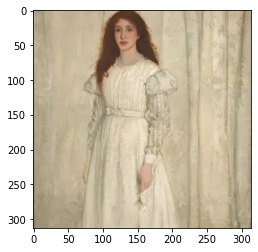

In [96]:
IMG_FOLDER = "../data/final/img/"

img = cv.imread(IMG_FOLDER + img_names[0])
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [97]:
images = list(map(lambda name: cv.imread(IMG_FOLDER+name), img_names))

In [99]:
def featuresExtraction(img):
    img=img/255
    (B, G, R) = cv.split(img) #separa la imagen en sus 3 canales
    grayscale = 0.3*R+0.59*G+0.11*B
    return (grayscale.mean(), B.mean(), G.mean(),R.mean(),grayscale.std(),B.std(), G.std(),R.std())

In [101]:
features = list(map(featuresExtraction, images))
features_df = pd.DataFrame(features, columns =["mean_grayscale", "mean_blue", "mean_green","mean_red","std_grayscale","std_blue", "std_green","std_red"])
features_df.head()

,mean_grayscale,mean_blue,mean_green,mean_red,std_grayscale,std_blue,std_green,std_red
0,0.707468,0.592548,0.702255,0.759860,0.113919,0.112658,0.117957,0.108062
1,0.591144,0.519539,0.586287,0.626952,0.204013,0.186520,0.203947,0.212146
2,0.687141,0.638097,0.687555,0.704309,0.133684,0.122419,0.133433,0.139909
3,0.696685,0.713158,0.700890,0.682375,0.119145,0.071436,0.113651,0.153838
4,0.836621,0.802547,0.829830,0.862469,0.246921,0.279878,0.261812,0.241762


In [102]:
#ToDo: Add id to new dataframes 
df_final = pd.concat([clean_df,features_df], axis=1)
df_final.sample(5)

,index,category,filename,Title,Date Created,Dimensions,Artist,mean_grayscale,mean_blue,mean_green,mean_red,std_grayscale,std_blue,std_green,std_red
2405,2405,BLUE,2405.jpg,Saint Anthony of Padua,c. 1502,w164 x h256 cm,Raphael,0.296025,0.313209,0.283871,0.313629,0.195640,0.134790,0.182961,0.261054
4719,4719,TEAL,4719.jpg,Seashore with Figures,ca. 1902 - 1904,w14 x h10.75 in.,Maurice Brazil Prendergast,0.517749,0.443481,0.561722,0.458499,0.166686,0.186053,0.178544,0.190225
4277,4277,TEAL,4277.jpg,Road to the Hills,c. 1918,Panel dimensions 30 × 40 in. (76.2 × 101.6 cm...,Julian Onderdonk,0.465668,0.444115,0.482926,0.439630,0.121973,0.138908,0.128166,0.135230
5294,5294,GREEN,5294.jpg,At The River,ca. 1950,50x40 cm,Alfonso X. Peña,0.377743,0.278733,0.394613,0.380869,0.146085,0.129809,0.161013,0.190904
2734,2734,BLUE,2734.jpg,Fruto pampeano,1966,57 x 45 in,Pérez Celis,0.332565,0.358019,0.302823,0.381723,0.176986,0.151441,0.155921,0.292135


In [ ]:
df_final.to_csv(f'../data/final/pictures.csv', index = False)